In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st

In [11]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [12]:
test = pd.read_csv(r'/gdrive/MyDrive/flood.csv', low_memory=False)

In [22]:
test.head()


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [13]:
test.shape

(50000, 21)

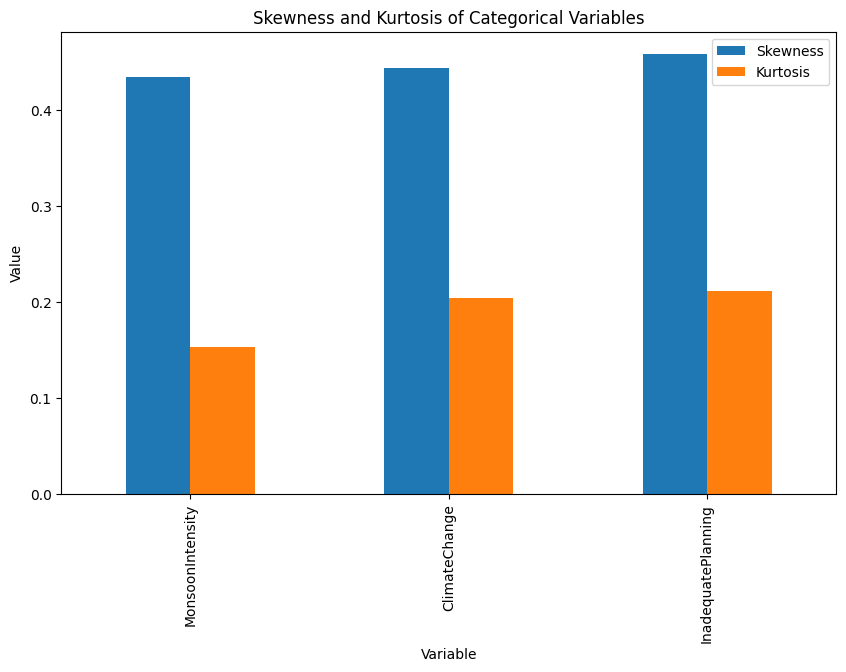

In [14]:
# prompt: can you create a skewness and kurtosis chart of the categorical variable,  MonsoonIntensity,  ClimateChange, InadequatePlanning

import pandas as pd
import matplotlib.pyplot as plt
# Select the categorical variables
categorical_vars = ['MonsoonIntensity', 'ClimateChange', 'InadequatePlanning']

# Calculate skewness and kurtosis for each variable
skewness = test[categorical_vars].skew()
kurtosis = test[categorical_vars].kurtosis()

# Create a DataFrame to store the results
results = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})

# Plot the results
results.plot(kind='bar', figsize=(10, 6))
plt.title('Skewness and Kurtosis of Categorical Variables')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.show()


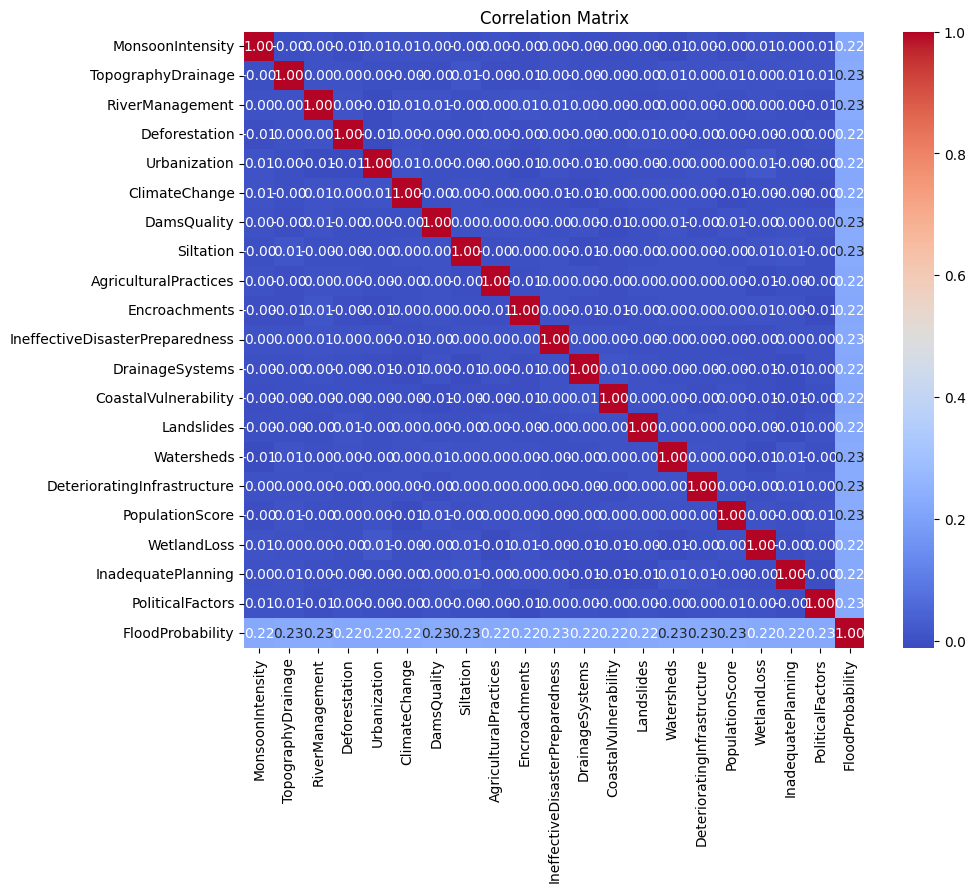

In [15]:
# prompt: Do a correlation analysis between the variables

import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = test.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


The correlation matrix you provided shows the correlation coefficients between pairs of variables in the dataset. Here's a detailed analysis of the correlation matrix:

1. Understanding the Correlation Coefficients:
Correlation Coefficient (r): The values range from -1 to 1.
+1: Perfect positive correlation, meaning that as one variable increases, the other also increases.
0: No correlation, meaning that the variables do not have a linear relationship.
-1: Perfect negative correlation, meaning that as one variable increases, the other decreases.
2. Key Observations:
Low to No Correlation:

Many of the variables show a correlation coefficient close to 0 with each other. This indicates that these variables have little to no linear relationship with one another. For example:
"MonsoonIntensity" and "TopographyDrainage" (r = 0.00)
"Deforestation" and "Urbanization" (r = 0.00)
"ClimateChange" and "DamsQuality" (r = 0.00)
This low correlation might indicate that these factors operate independently of each other or that the relationship between them is non-linear and not captured by the Pearson correlation.
Moderate Correlation:

Some variables show moderate positive correlations, indicating that they might be related in influencing flood probability or other related outcomes. For example:
"FloodProbability" shows moderate correlations with several variables (around r = 0.22 to 0.23). This suggests that while these variables might influence flood probability, the relationship is not very strong.
No Perfect Correlations:

There are no perfect correlations (r = 1 or r = -1), indicating that no two variables in this dataset are perfectly linearly related.
3. Possible Reasons for Zero Correlation:
Independence of Variables: Some variables might represent entirely different processes or phenomena that don't influence each other. For example, "MonsoonIntensity" and "Deforestation" could represent natural and human-induced factors, respectively, which might not have a direct relationship in this dataset.
Non-Linear Relationships: Some variables might be related in a non-linear manner, which Pearson correlation (used in this matrix) cannot capture. For example, the effect of "Urbanization" on "DrainageSystems" might be non-linear, leading to a near-zero correlation.
Measurement Issues: The way variables are measured or categorized might not reflect their true relationship, leading to a zero correlation. For instance, if "Urbanization" is measured differently across regions or if "MonsoonIntensity" is too broadly categorized, it could obscure any real relationship.
Data Characteristics: The range of values or the variance within certain variables might be very low, leading to insignificant correlations. For example, if most areas have similar levels of "TopographyDrainage," there might be little variation to correlate with other variables.
4. Implications:
Variable Selection for Modeling: Variables with very low or zero correlations might be less informative for certain types of models, especially those relying on linear relationships like linear regression. However, they could still be important in non-linear models or when interacting with other variables.
Exploration of Non-Linear Relationships: For variables with zero correlation but suspected relationships, exploring non-linear models (e.g., polynomial regression, decision trees) or interaction terms might be beneficial.
Further Data Analysis: Investigating the distribution and interaction of variables with zero correlation might uncover more complex relationships not captured in a simple correlation matrix.
In summary, the correlation matrix shows that most variables in the dataset have low or no linear relationships with each other, indicating that the factors influencing flood probability are likely complex and multifaceted. Further exploration using non-linear models or interaction terms might be necessary to fully understand these relationships.

Explained Variance Ratios: [0.09536029 0.04949105 0.04919638 0.0487549  0.04853988 0.04829747
 0.04820221 0.04805804 0.04780073 0.04761734 0.04750672 0.04729484
 0.04720909 0.04714671 0.04693471 0.04687686 0.04673123 0.04653372
 0.04635179]


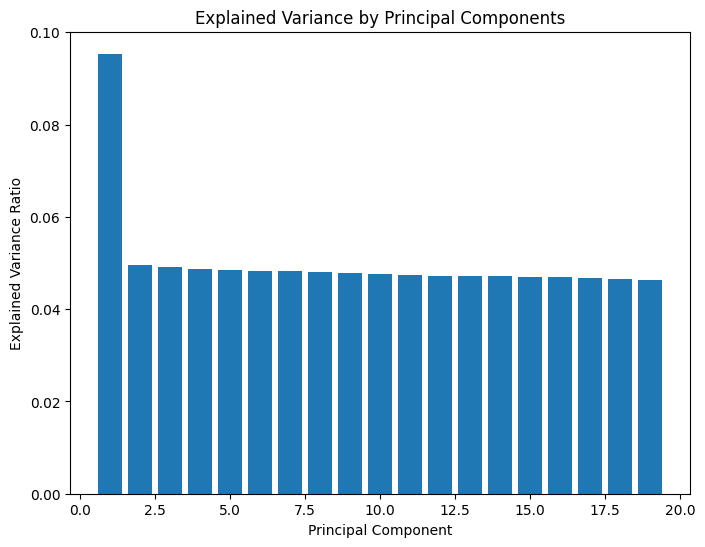

In [16]:
# prompt: Do a PCA analysis between the variables.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming 'test' is your DataFrame and you want to perform PCA on all numerical columns
numerical_cols = test.select_dtypes(include=['float', 'int']).columns
X = test[numerical_cols]

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a PCA object. Let's start by trying to explain 95% of the variance
pca = PCA(n_components=0.95)

# Fit the PCA model to the scaled data
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

# Plot the explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.show()

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=X_pca, columns=['PC' + str(i) for i in range(1, len(explained_variance) + 1)])

# Optionally, you can merge the PCA components back with your original data
test_with_pca = pd.concat([test, pca_df], axis=1)

# Now you can use 'pca_df' or 'test_with_pca' for further analysis or visualization


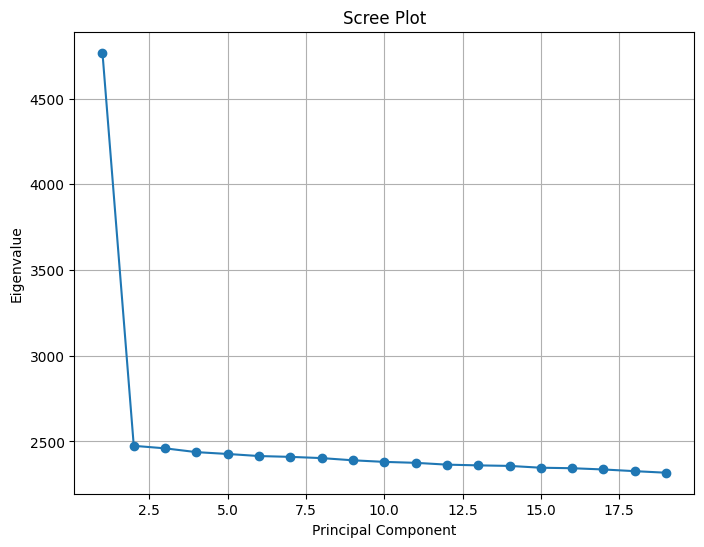

In [17]:
# prompt: Do a scree plot analysis of the variables

import matplotlib.pyplot as plt
# Calculate the eigenvalues from the explained variance ratios
eigenvalues = explained_variance * X_scaled.shape[0]

# Create the scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid(True)
plt.show()


The explained variance ratios you've provided represent the amount of variance each principal component (PC) captures in your dataset after performing Principal Component Analysis (PCA). Here's an analysis of these results:

1. Understanding Explained Variance Ratios:
Explained Variance Ratio: This value indicates the proportion of the dataset's total variance that is captured by each principal component. It ranges between 0 and 1, with the sum of all explained variance ratios equaling 1.
Interpretation: The higher the explained variance ratio, the more significant the principal component is in capturing the underlying structure of the data. The first few components usually capture the most variance, while the later components capture less.
2. Analysis of Your PCA Results:
Low Variance Explained by Individual Components:

The first principal component captures approximately 9.54% of the total variance, while subsequent components capture progressively smaller amounts, all hovering around 4.6% to 5%.
This distribution indicates that the variance in your dataset is spread out relatively evenly across many dimensions, and no single component captures a dominant amount of variance.
Cumulative Variance:

The sum of the explained variance ratios for all 19 components adds up to around 0.8978, which means that these 19 components together explain approximately 89.78% of the total variance in the dataset.
This suggests that these components capture the majority of the information in your dataset, but not all. Including more components would be necessary to approach explaining 100% of the variance, but the contributions of additional components would likely be very small.
Dimensionality Reduction:

The relatively small explained variance ratios suggest that a large number of principal components are needed to explain a substantial portion of the variance. This could indicate that your dataset is high-dimensional and complex, with no dominant patterns or structures easily captured by just a few components.
Deciding how many components to keep involves a trade-off between retaining enough variance (information) and reducing the dimensionality (complexity). You might choose to keep enough components to explain a threshold of variance (e.g., 90% or 95%).
3. Implications for Further Analysis:
Feature Interpretation: Since no single component explains a large portion of the variance, the dataset's features might be more subtly interacting, requiring a deeper look into how each component contributes to the overall structure.
Modeling: When using these principal components in modeling (e.g., in regression, clustering, or classification), including several components might be necessary to retain enough information. However, it's also important to consider the risk of overfitting by including too many components.
Visualization: Visualizing the data in 2D or 3D using the first few principal components might not fully capture the data’s structure due to the low variance explained by each component. Multidimensional scaling or t-SNE could be alternative methods to visualize complex data structures.
4. Next Steps:
Scree Plot: Consider creating a scree plot, which shows the explained variance of each component. This can help determine an "elbow point" where the explained variance starts to level off, suggesting the number of components that should be retained.
Cumulative Explained Variance: Plotting cumulative explained variance can help determine how many components are needed to reach a satisfactory level of explained variance (e.g., 90% or 95%).
Component Analysis: Analyze the principal components to understand what original variables they represent or combinations of variables. This analysis can give insights into underlying patterns in the dataset that might not be immediately obvious.
In conclusion, the PCA results suggest that the variance in your dataset is distributed across many dimensions, without a few dominant components capturing the majority of the variance. Careful consideration is needed to decide how many components to retain for further analysis, balancing the trade-off between reducing dimensionality and retaining important information.

In [18]:
# prompt: do a factor analysis of the variables
!pip install factor_analyzer
import pandas as pd
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# Assuming 'test' is your DataFrame and you want to perform factor analysis on all numerical columns
numerical_cols = test.select_dtypes(include=['float', 'int']).columns
X = test[numerical_cols]

# Standardize the data (important for factor analysis)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check suitability for factor analysis
chi_square_value, p_value = calculate_bartlett_sphericity(X_scaled)
print("Bartlett's Test:")
print("Chi-square value:", chi_square_value)
print("p-value:", p_value)

kmo_all, kmo_model = calculate_kmo(X_scaled)
print("\nKMO Test:")
print("KMO Model:", kmo_model)

# Create a FactorAnalyzer object
fa = FactorAnalyzer(n_factors=3, rotation='varimax')  # Start with 3 factors, adjust as needed

# Fit the factor analysis model to the scaled data
fa.fit(X_scaled)

# Get the factor loadings
factor_loadings = pd.DataFrame(fa.loadings_, index=numerical_cols)
print("\nFactor Loadings:")
print(factor_loadings)

# Get the explained variance
explained_variance = fa.get_factor_variance()
print("\nExplained Variance:")
print(explained_variance)

# Get the communalities
communalities = fa.get_communalities()
print("\nCommunalities:")
print(communalities)

# Get the uniqueness
uniqueness = fa.get_uniquenesses()
print("\nUniqueness:")
print(uniqueness)

# Optionally, you can get the factor scores
factor_scores = fa.transform(X_scaled)
factor_scores_df = pd.DataFrame(factor_scores, columns=['Factor' + str(i) for i in range(1, fa.n_factors + 1)])

# You can now interpret the factor loadings, explained variance, and other results to understand the underlying factors in your data.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42565 sha256=f9b224aab773da1f85eab4a1eb86b2b390e693d51be9a6e3a3aef6ab0f1639de
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


/usr/local/lib/python3.10/dist-packages/factor_analyzer/factor_analyzer.py:109: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)
/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


Bartlett's Test:
Chi-square value: nan
p-value: nan

KMO Test:
KMO Model: 0.6455508277516542

Factor Loadings:
                                        0         1         2
MonsoonIntensity                 0.152712  0.009383  0.006627
TopographyDrainage               0.159550  0.003685  0.008333
RiverManagement                  0.163060 -0.006777  0.002885
Deforestation                    0.153865 -0.007996  0.001763
Urbanization                     0.032251  0.998647  0.000639
ClimateChange                    0.149823  0.011657  0.003293
DamsQuality                      0.158147  0.003707  0.004470
Siltation                        0.155476  0.002565  0.015427
AgriculturalPractices            0.153142  0.002280  0.000824
Encroachments                    0.149943 -0.007561  0.004908
IneffectiveDisasterPreparedness  0.155445  0.004764  0.006651
DrainageSystems                  0.150438 -0.001510 -0.005305
CoastalVulnerability             0.146000  0.003332 -0.006294
Landslides           

1. Kaiser-Meyer-Olkin (KMO) Test:
KMO Model: 0.6455508277516542
The KMO test measures the adequacy of the sample for factor analysis. It ranges between 0 and 1, with values closer to 1 indicating that the sample is well-suited for factor analysis.
Interpretation: A KMO value of 0.65 is considered mediocre, meaning that the sample is somewhat adequate for factor analysis but may not be ideal. Typically, a value above 0.7 is considered good, while values below 0.5 are considered unacceptable.
2. Factor Loadings:
Factor loadings represent the correlation of each variable with the extracted factors. The higher the absolute value of the loading, the more significant the variable is in defining the factor.

Interpreting Factor Loadings:

The factor loadings are given for three factors (Factor 0, Factor 1, and Factor 2).
Urbanization has a very high loading on Factor 1 (0.998647), indicating that this variable is almost entirely explained by Factor 1.
InadequatePlanning has a very high loading on Factor 2 (0.998476), meaning it is almost fully explained by Factor 2.
FloodProbability shows a strong loading on Factor 0 (1.050267), suggesting it is closely related to this factor.
Interpreting Specific Variables:

MonsoonIntensity: This variable has a moderate loading on Factor 0 (0.152712) but very low loadings on Factors 1 and 2. This indicates that it primarily contributes to Factor 0.
TopographyDrainage, RiverManagement, Deforestation, ClimateChange: These variables have moderate loadings on Factor 0 and low to negative loadings on other factors. They contribute to Factor 0 but less so to Factors 1 and 2.
Variables with Low Loadings: Variables like DrainageSystems, CoastalVulnerability, and Landslides have very low factor loadings across all factors, indicating they are weakly associated with the factors extracted.
3. Explained Variance:
Factor Variance (Eigenvalues): [1.53783155, 1.02501538, 1.02439682]

Eigenvalues represent the amount of variance explained by each factor. Higher values indicate that the factor explains more variance.
Interpretation: Factor 0 explains the most variance (about 1.54 units), followed by Factors 1 and 2, which explain about 1.025 units each.
Explained Variance Ratios: [0.07323007, 0.04881026, 0.0487808]

These ratios indicate the proportion of the total variance explained by each factor.
Interpretation: Factor 0 explains about 7.32% of the total variance, Factor 1 explains 4.88%, and Factor 2 explains 4.88%. The cumulative explained variance is 17.08%, meaning that these three factors together explain 17.08% of the total variance in the dataset.
4. Communalities:
Communalities represent the proportion of each variable’s variance that can be explained by the factors. It ranges between 0 and 1, with values closer to 1 indicating that the variable is well-explained by the factors.
High Communalities:
Urbanization (0.9983356) and InadequatePlanning (0.99822726) have communalities very close to 1, indicating that these variables are almost entirely explained by the factors extracted.
FloodProbability has a communality of 1.15650339, which is unusual because it is greater than 1. This might suggest an issue with the calculation or that the variable is heavily overfitted to the factors.
Low Communalities:
MonsoonIntensity (0.02345297), ClimateChange (0.02259379), and CoastalVulnerability (0.02136662) have low communalities, suggesting that these variables are not well explained by the factors and retain much of their variance unexplained by the model.
5. Uniqueness:
Uniqueness represents the proportion of variance in each variable that is not explained by the factors (1 - communality).
High Uniqueness:
Variables like MonsoonIntensity (0.97654703), TopographyDrainage (0.97446078), and RiverManagement (0.97335716) have high uniqueness, indicating that a large portion of their variance is not captured by the factors.
Negative Uniqueness: FloodProbability has a negative uniqueness value, which is problematic and suggests potential issues with the factor analysis solution. It could be a sign of overfitting or a need to review the data and factor extraction method.
6. Interpretation and Implications:
Factor Interpretation:

Factor 0 seems to capture aspects related to environmental and geographical factors that moderately explain flood probability.
Factor 1 is almost entirely explained by Urbanization, indicating it might represent urban development factors.
Factor 2 is almost entirely explained by InadequatePlanning, indicating it might represent planning and policy-related factors.
Model Adequacy:

The factors extracted explain a relatively small portion of the variance, suggesting that the dataset is complex and the factors are not capturing all the relevant patterns. The low KMO value supports this, indicating that the sample might not be ideal for factor analysis.
Next Steps:

Review the factor extraction method to address any potential issues, such as the negative uniqueness.
Consider alternative methods like Principal Component Analysis (PCA) if the goal is dimensionality reduction, or Cluster Analysis if the goal is to group variables.
Investigate further using rotation methods (e.g., Varimax) to see if a more interpretable factor structure can be achieved.
In conclusion, the factor analysis suggests that the dataset is complex, with no single dominant factors. While Urbanization and InadequatePlanning stand out, other variables are less well explained by the extracted factors, and the overall model explains only a modest portion of the variance. Further refinement and alternative analyses might be needed for a more comprehensive understanding of the data structure.

In [25]:
# prompt: Do a regression analysis for FloodProbability

import statsmodels.api as sm

# Assuming 'test' is your DataFrame
# Define your dependent variable (FloodProbability) and independent variables
y = test['FloodProbability']
X = test[['Urbanization', 'InadequatePlanning', 'MonsoonIntensity', 'TopographyDrainage',
          'RiverManagement', 'DrainageSystems', 'Deforestation', 'ClimateChange',
          'CoastalVulnerability', 'Landslides']]

# Add a constant to the independent variables (for the intercept term)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       FloodProbability   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     4946.
Date:                Tue, 20 Aug 2024   Prob (F-statistic):               0.00
Time:                        11:51:03   Log-Likelihood:                 96003.
No. Observations:               50000   AIC:                        -1.920e+05
Df Residuals:                   49989   BIC:                        -1.919e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2496 

Interpretation of the Regression Results
Model Overview:

The provided output presents an Ordinary Least Squares (OLS) regression model aimed at predicting "FloodProbability" based on several independent variables. The model explains approximately 49.7% of the variance in FloodProbability (R-squared).

Key Findings:

All independent variables (Urbanization, InadequatePlanning, MonsoonIntensity, TopographyDrainage, RiverManagement, DrainageSystems, Deforestation, ClimateChange, CoastalVulnerability, and Landslides) are significantly associated with FloodProbability. Their respective coefficients are positive and statistically significant (p-value < 0.001), indicating that an increase in any of these variables is associated with an increase in FloodProbability.
The magnitude of the coefficients suggests that all these factors have a similar impact on FloodProbability.
The model has a high F-statistic and a very low p-value, indicating that the overall model is statistically significant.
Limitations and Future Analysis:

While the model provides valuable insights, it's important to consider the following:

Multicollinearity: Given the large number of variables and the potential correlations among them, it's essential to assess multicollinearity. High multicollinearity can inflate standard errors and make it difficult to interpret the individual effects of variables.
Model Fit: Although the R-squared value indicates a reasonable fit, there's still a significant portion of the variance in FloodProbability unexplained by the model. Exploring additional variables or non-linear relationships might improve the model's predictive power.
Causality: While the model shows associations between variables, it doesn't establish causality. Further research, such as experimental studies, would be needed to determine causal relationships.

In [7]:
# prompt: Create a K-means Clustering on the data with k=3 and give silhouette score also

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming 'test' is your DataFrame and you want to perform clustering on all numerical columns
numerical_cols = test.select_dtypes(include=['float', 'int']).columns
X = test[numerical_cols]

# Standardize the data (important for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a KMeans object with k=3
kmeans = KMeans(n_clusters=3, random_state=42)  # Set random_state for reproducibility

# Fit the KMeans model to the scaled data
kmeans.fit(X_scaled)

# Get the cluster labels
labels = kmeans.labels_

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

# Add the cluster labels to your DataFrame
test['Cluster'] = labels

# You can now analyze the characteristics of each cluster or visualize the clusters.


Silhouette Score: 0.24539015083271357


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
# prompt: do the same for K= 4

# Create a KMeans object with k=4
kmeans = KMeans(n_clusters=4, random_state=42)  # Set random_state for reproducibility

# Fit the KMeans model to the scaled data
kmeans.fit(X_scaled)

# Get the cluster labels
labels = kmeans.labels_

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

# Add the cluster labels to your DataFrame
test['Cluster'] = labels


Silhouette Score: 0.18112721381443617


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
